# Generating Power sets: Two Approaches (Part 1)

## Overview

In this three post series, we will demonstrate how to construct the power set of a given source set using two different, but functionally-equivalent, methods. In case you're wondering, the power set of a set $S$ is the collection of all (unique) subsets of $S$, including the empty set and $S$ itself. In order to include subsets as members of the power set, we will define a new object class, `ModSet()`, to encapsulate member sets in "hashable" containers.  

In part one, we'll use a ~~minimal~~ working example to demonstrate our solution to the subset inclusion problem.  In part two, we construct the `ModSet()` object with all the methods necessary to support power set generation by two distinct approaches. Finally, in part three we develop and run binary mask and recursive routines for generating power sets in Python.

## Power sets defined and how to build them

Now, a bit about power sets.  

If a set $S$ has $n$ elements, its power set will have $2^n$ member subsets; these include the complete "source" set, $S$ itself, as well as the empty set, $\emptyset$. For example, the power set of set $\{x,y,z\}$ is: $\{\emptyset, \{x\}, \{y\}, \{z\}, \{x, y\}, \{x, z\},  \{y, z\}, \{x, y, z\}\}$. Please notice that there are $2^3=8$ subset elements, all of which are unique; that is, no two subsets contain the same collection of members.

Why $2^n$? Because all possible subsets can be formed by selecting their members according to digit occurance in the base-2 integers that count from $0$ to $2^n$ 

Clear as mud, right? Don't worry, we'll explain.

### The Binary Mask approach

Say we have a source set comprised of four members, $\{a,b,c,d\}$. The corresponding mask will have four digits that can each take on values of either $0$ or $1$. If a mask digit equals $1$ we keep the element in the corresponding location of the source set, if a digit is $0$, we reject the corresponding element. 

Here's an illustrative example: binary mask $0101$ operating on source set $\{a,b,c,d\}$ would form subset member $\{b,d\}$ of the power set.  Similarly, binary mask $1110$ selects subset $\{a,b,c\}$. Using the same rule, mask $0000$ selects $\emptyset$, while $1111$ forms the original source set of all four elements. There are $2^4=16$ unique bit combinations in a 4-digit binary mask, so there are $16$ unique member subsets in the power set of a four-element source set. Now, extending this procedure to a set comprised of $n$ elements rather than $4$, you can see that its power set will have $2^n$ member subsets by the same rule (the binomal theorem).

The above procedure may seem to have a certain efficiency and elegance in its directness; one might go so far to say that it is the "best" way to generate a power set. In this series, we'll call this method the "Binary Mask approach".

But there is another method we can use to build power sets...

### The Recursive approach

Alternatively, you can take your source set, $\{a,b,c,d\}$, remove one of its members, $a$, then define a new subset with the members that remain, $\{b,c,d\}$, and include it as a new element of the power set. Repeating this process, using all elements on all subsets, you will produce the complete power set of the original source set. 

For example: removing $b$ from our source set leaves subset $\{a,c,d\}$. Removing element $c$ from subset $\{a,c,d\}$ leaves subset $\{a,d\}$.  Taking $a$ from subset $\{a,d\}$ results in subset $\{d\}$. And finally, removing element $d$ from subset $\{d\}$ results in $\emptyset$. Then we go all the way back up to the top, this time taking $c$ from $\{a,b,c,d\}$ and repeat the entire stripping procedure until we are left with $\emptyset$ as above. Then do the same starting with members $d$ and $a$; repeating the full stripping procedure for each. Notice that we could have removed any element from any set; a recursive algorithm would remove all elements, one-by-one, from each subset.  Many duplicate subsets will be generated in this process, so enforcing member uniqueness will be critical. 

This second procedure to generate power sets we'll call the "Recursive approach".  While the Recursive approach may lack the directness and efficiency of the Binary Mask procedure, we hope that coding it will at least prove to be a worthwhile, "chops-building", exercise in recursion.

Before we can do either of these, however, we need to investigate the behavior of Python's `set()` class. Specifically, if it suffices for our purposes of containing subsets within an all-encompassing superset, in our case: the power set.

\[Spoiler alert... it doesn't.\]

## The Python set class

The set class in python takes only immutable types (e.g. strings, numeric values, and tuples) as members. Under the hood, a `set()` object retains a *hash* or *pointer* to an immutable object that is a member.  

In [2]:
shinyPrez = set([20.1, 2017, ('alternative', 'facts'), 'record-setting'])
shinyPrez.add('covfefe')
shinyPrez

{('alternative', 'facts'), 20.1, 2017, 'covfefe', 'record-setting'}

Something to notice: the ordering of elements in the set's output string does *not* match their ordering in its definition. Unlike Python's iterable `list()` class, `set()` objects do not retain member ordering. 

When you try to insert a mutable type, lists or dictionaries for example, Python will spit back an 'unhashable' type error.

In [3]:
shinyPrez.add(['Cambridge', 'Analytica'])

TypeError: unhashable type: 'list'

See, no dice.  Also, because `set()` objects are mutable, the same goes if you attempt to include a `set` as a member of another `set`.

In [4]:
woopsy = set([('impeachment', 'procedings')])
woopsy

{('impeachment', 'procedings')}

In [5]:
shinyPrez.add(woopsy)

TypeError: unhashable type: 'set'

Though you can join sets together, by combining unique members into a single pool, with the `set.union()` operation.

In [6]:
shinyPrez = shinyPrez.union(woopsy)
shinyPrez

{('alternative', 'facts'),
 ('impeachment', 'procedings'),
 20.1,
 2017,
 'covfefe',
 'record-setting'}

Now, because separate instances of a class are allocated their own locations in memory, they are hashable; even if they contain unhashable values as attributes. And, even if the values of the attributes of the two instances are equivalent.

In [7]:
class Advisor():
    def __init__(self):
        self.val = {'Presidential', 'pardon'}  # Attribute contains unhashable set
        
RogerS = Advisor()   # has set for attribute .val
PaulM = Advisor()  # has same set as above for its attribute .val
modelCitz = set([PaulM, RogerS])  # include the two instances as members of a set
print(type(modelCitz))           # c is indeed a set
print([type(el) for el in modelCitz]) # members of the set are instances of Advisor class
print([type(el.val) for el in modelCitz])  # attributes of member instances are sets

<class 'set'>
[<class '__main__.Advisor'>, <class '__main__.Advisor'>]
[<class 'set'>, <class 'set'>]


We adopted the above definition from [Max Bernstein's blog](https://bernsteinbear.com/blog/recursive-python-objects/).  Also, we can instruct that instances of the class, when called, define themselves as their `.val` attribute<sup>[1](#Sources-(part-1))</sup>.

In [8]:
class Advisor():
    def __init__(self):
        self.val = {'Presidential', 'pardon'}
    def __repr__(self):  # method to generate representative code string
        return self.val.__repr__()  # return __repr__ code string for the
                                    # Advisor().val attribute

MichaelF = Advisor()
noHarmDone = set([MichaelF])
noHarmDone

{{'pardon', 'Presidential'}}

A quick look might suggest that we bypassed `set()`'s exclusion of mutables here. But don't be fooled. While we have the *appearence* of having a `set` object contained within another `set` object, what we actually have is a `set` that contains a hash to an instance of `Advisor()` that has a `set` as an attribute.

In [9]:
print(type(noHarmDone))  # Notice that set()'s lack of indexing
print(type(list(noHarmDone)[0]))  # methods can be a bit 
print(type(list(noHarmDone)[0].val))  # of a pain..!

<class 'set'>
<class '__main__.Advisor'>
<class 'set'>


The skeptical Python programmer at this stage is likely asking her/his/them-self: "why don't you just use a `list` object rather than defining a whole 'nother class for chrissakes!?!"  Number 1, lists are not hashable; for our power set generatation routines to come, we require a container that is.  Number 2, lists permit duplicate entries; enforcing member uniqueness would require more coding. Number 3, lists preserve element ordering; while not a deal-breaker for our purposes, lists do not mathematically qualify as sets for this reason and others.

In part two, we'll define a new class, `ModSet()`, that will behave much like Python's `set()` class, but with an added `set`-valued attribute. Our `ModSet()` class will employ the same approach just demonstrated above: use of a hashable class instance to contain unhashable set objects. With these container instances themselves eligible for membership in a super-`set()` object. Use of `ModSet` objects will allow us to form an all-encompassing powerset that--indirectly--has sub-`set()` instances as members. More than a cosmetic device, defining a set container class in this way will allow the powerset of a given `set` object to be generated using Binary Mask and Recursion-based algorithms later on in part three.

## Sources (part 1)

1. Max Bernstein, [Recursive Python Objects](https://bernsteinbear.com/blog/recursive-python-objects/), https://bernsteinbear.com/blog.

# Generating Power sets: Two Approaches (Part 2)

In part one, we showed that instances classes are hashable, so they can be included as elements of a `set` object. If the class instance happens to have a `set`-valued attribute, we effectively have a `set` with another `set` as a member, made possible by the instance acting as a "container"<sup>[1](#Sources-(part-2))</sup>.  In the post that follows, we'll craft a new class that incorporates the container behavior illustrated in part one, as well as a number of other methods that will prove necessary when we build power sets in part three. 

## Define a set container class

Using the illustrative example in part one, we will define a new class, `ModSet()`, with the same constructor and representation methods. New instances of the class will require a set argument, either occupied or empty. In addition, we will define methods to copy, nest and unnest instances of the class.

In [ ]:
class ModSet():
    
    # Instance constructor
    def __init__(self, setElement):
        self.val = setElement  # set arg saved in .val attribute
    
    # String eval representation of self instance 
    def __repr__(self):
        return self.val.__repr__() # Return string eval represent.
                                   # of string object in .val
    
    # Method to make a copy of self instance
    def __copy__(self):
        return ModSet(self.val)
    
    # Modify .val to contain the set of itself, of itself, ...
    # nesting .val "depth" number of levels.
    def pushDown(self, depth):
        while depth > 0:
            self.val = set([ModSet(self.val)])
            depth -= 1     
    
    # Remove one nesting level from set in self.val.
    # If un-nested, ignore.
    def pullUpOneLevel(self):
        listSet = list(self.val)
        if len(listSet) == 1:
            self.val = listSet[0].val
        else:
            pass
    
    # Remove height number of nesting levels from set in
    # self.val by repeatedly calling above method
    def pullUp(self, height):
        while height > 0:
            self.pullUpOneLevel()
            height -= 1
                

Testing these, let's define a set of mixed immutables and nest it 3 levels deep.

In [10]:
worldlyPrez = ModSet(set([('televised', 'summit'), 'DMZ', 12.6, 2019, '\"bromance\"']))
worldlyPrez.pushDown(3)
worldlyPrez

{{{{('televised', 'summit'), 2019, '"bromance"', 12.6, 'DMZ'}}}}

Raising that result back up three levels should return the set to how it was originally defined.

In [11]:
worldlyPrez.pullUp(3)
worldlyPrez

{('televised', 'summit'), 2019, '"bromance"', 12.6, 'DMZ'}

If you instruct to pull up greater than the set is deep, the extra assentions are ignored.

In [12]:
worldlyPrez.pullUp(2)
worldlyPrez

{('televised', 'summit'), 2019, '"bromance"', 12.6, 'DMZ'}

## Enforcing uniqueness

Just like Python's set class, we will make sure that each member of ModSet be unique according to the value of its `.val` attribute.  When a ModSet is comprised of immutables, the `set()` class enforces uniqueness for us automatically.  However, if a ModSet contains other ModSets, we require an additional method to enforce uniqueness among them as well.

In [ ]:
class ModSet():
    .
    .
    .
    def removeDuplicates(self):
        uniqueSet = set()  # initialize as empty the unique set to be built
        for s in self.val:  # s is a member of the ModSet().val set
            inUniqueSet = False  # initialize match detetion flag as false
            sTest = s  # default conditional testing value for s
            for us in uniqueSet: # us is a member of the uniqueSet set
                usTest = us  # default conditional testing value for us
                if isinstance(us, ModSet): # if member us is a ModSet
                    usTest = us.val        # change testing value to its attribute
                if isinstance(s, ModSet):  # if member s is a ModSet
                    sTest = s.val          # change testing value to its attribute
                if usTest == sTest:  # compare us and s testing values on this run
                    inUniqueSet = True  # if match, set existence flag to true
            if not inUniqueSet:    # only add member s to uniqueSet if
                uniqueSet.add(s)   # match is NOT detected
        self.val = uniqueSet    # set .val to the uniqueSet from above

After including `removeDuplicates()` in our class definition we'll test it as follows. 

In [13]:
prez1 = ModSet(set([('televised', 'summit'), 'DMZ', 12.6, 2019, '\"bromance\"']))  # inst. 1
prez2 = ModSet(set([('televised', 'summit'), 'DMZ', 12.6, 2019, '\"bromance\"']))  # inst. 2
prez3 = ModSet(set([('televised', 'summit'), 'DMZ', 12.6, 2019, '\"bromance\"']))  # inst. 3
print(set([id(prez1), id(prez2), id(prez3)]))  # each instance held in its own memory block

modSetOfPrez = ModSet(set([prez1, prez2, prez3]))  # define a ModSet of ModSet instances
print(modSetOfPrez.val)  # set class sees each instance as unique though they contain 
                         # equivalent values in their attributes

{140437984002736, 140437984002792, 140437984002680}
{{('televised', 'summit'), 2019, '"bromance"', 12.6, 'DMZ'}, {('televised', 'summit'), 2019, '"bromance"', 12.6, 'DMZ'}, {('televised', 'summit'), 2019, '"bromance"', 12.6, 'DMZ'}}


Now let's call our uniqueness filter.  Only one member should remain.

In [14]:
modSetOfPrez.removeDuplicates()  # enforce uniqueness according to attribute value
print(modSetOfPrez)   # result after applying removeDuplicates()

{{('televised', 'summit'), 2019, '"bromance"', 12.6, 'DMZ'}}


## Set operator methods

For the power set routines to come, we need instances of `ModSet()` to join by union and also separate by set-subtraction.  Below, we define methods for these operations as well as set-intersection.

In [ ]:
class ModSet():
    .
    .
    .
    # union-join multiple items, enforce that ModSet members be unique
    def union(self, *modSets):
        for modSet in modSets:
            self.val = self.val.union(modSet.val)  # this is union method from set class
            self.removeDuplicates()  # removes duplicate-valued instances of ModSet members
    
    # take set intersection of multiple items
    def intersection(self, *modSets):
        for modSet in modSets:
            self.val = self.val.intersection(modSet.val) # method from set class
    
    # take set difference of multiple items. Note: arg order matters here! 
    def difference(self, *modSets):
        for modSet in modSets:
            self.val = self.val.difference(modSet.val) # method from set class
    
    # version of above method that returns a new instance for assignment.
    # Note: only two arguments here.
    def diffFunc(modSet1, modSet2):
        return ModSet(set.difference(modSet1.val, modSet2.val))

### Testing ModSet Union

With the set operation methods now included in the class, let's test union-joining of non-ModSet objects.

In [15]:
charges = ModSet(set())
charge1 = ModSet(set(['obstruction', 'of', 'Congress']))
charge2 = ModSet(set(['abuse', 'of', 'power']))
charge3 = ModSet(set(['incitement', 'of', 'insurrection']))

charges.union(charge1, charge2, charge3)
print(charges)

{'Congress', 'abuse', 'insurrection', 'obstruction', 'of', 'incitement', 'power'}


The three separate ModSets have been merged into a single ModSet, `charges`.  Notice that string member `'of'` appears only once, as it should, though it is present in `charge1`, `charge2`, and `charge3`.  Now, we'll test union operation with ModSet members present as well.

First, we'll nest down by one level each of the three charges, so that we can test `ModSet.union()`. This time we're interested in the case when ModSet-of-ModSets are present in the pool of objects to be joined.  By "ModSet-of-ModSet",  we mean a ModSet instance that has another ModSet instance as a member of its set-valued `.val` attribute--the result of `ModSet.pushDown(1)`. During the union call, these ModSet-of-ModSet objects will be routed through paths of `.removeDuplicates()` that we've set up specifically for them. 

In [16]:
charge1.pushDown(1)
charge2.pushDown(1)
charge3.pushDown(1)

charges.union(charge1, charge1, charge2, charge3, ModSet(set(['all', 'fake', 'news'])))
print(charges)

{'Congress', 'abuse', 'insurrection', 'obstruction', 'of', 'incitement', 'all', 'power', {'Congress', 'obstruction', 'of'}, {'insurrection', 'of', 'incitement'}, 'news', 'fake', {'power', 'of', 'abuse'}}


You should notice that though we have included `charge1` twice in the method-call, its value, `{'Congress', 'obstruction', 'of'}`, appears just once in the output. So, we may conclude that the `.removeDuplicates()` method does correctly enforce uniqueness among ModSet-of-ModSet members.  Members of `{'all', 'fake', 'news'}` have been included as well. Now that we've shown that `.union()` works as expected, we can move on to test `.intersection()`.

### Testing ModSet Intersection

In [17]:
claim1 = ModSet(set(['rounding', 'the', 'bend']))  # define a new instance of ModSet
claim2 = ModSet(set(['dems', 'stole', 'the', 'election'])) # define another new instance
claim1.union(charge1, charge2)  # union-join charges 1 and 2 from above with claim1 
claim2.union(charge2, charge3)  # union-join charges 2 and 3 from above with claim2
claim1.intersection(claim2)  # perform set-intersection of claims 1 and 2
claim1  # output the post-intersection result

{{'power', 'of', 'abuse'}, 'the'}

Above we form two "mixed" `ModSet()` instances that contain both top-level strings as well as sub-ModSets as members. We can see, after joining the two by set intersection, the result is what we expect: only `'the'` remains from the strings and only `charge2` survives among the ModSets. 

### Testing ModSet Set-difference

Above we included two methods for performing set-subtraction within the `ModSet()` class.  The first, called `.difference()`, is an inline function that modifies the original instance from which it is called. Removing `charge2` from `charges` 

In [18]:
charges.difference(charge2)
charges

{'Congress', 'abuse', 'insurrection', 'obstruction', 'of', 'incitement', 'all', 'power', {'Congress', 'obstruction', 'of'}, {'insurrection', 'of', 'incitement'}, 'news', 'fake'}

leaves `charges` with all but the `{'abuse', 'of', 'power'}` member in the result. So, check.  

The second method, that we've named `.diffFunc()`, is a functional version of set-subtraction that returns the result as a new instance `ModSet()` leaving its originating instances unchaged. To test `.diffFunc()`, we'll now attempt to remove `charge1` from `charges` (since `charge2` has already been removed in the previous step).

In [19]:
chargesReduced = ModSet.diffFunc(charges, charge1)
chargesReduced

{'Congress', 'abuse', 'insurrection', 'obstruction', 'of', 'incitement', 'all', 'power', {'insurrection', 'of', 'incitement'}, 'news', 'fake'}

You can see that the value from `charge1`, `{'obstruction', 'of', 'Congress'}`, is absent from `chargesReduced`, though all others from its parent, `charges`, are present.  

Lastly, let's examine `charges` to make sure that this particular instance has *not* been modified since last step.

In [20]:
charges

{'Congress', 'abuse', 'insurrection', 'obstruction', 'of', 'incitement', 'all', 'power', {'Congress', 'obstruction', 'of'}, {'insurrection', 'of', 'incitement'}, 'news', 'fake'}

And there the charge remains, in all its glory, one could say...  

Though our testing of `ModSet()` above has been far from exhaustive, we hope you are convinced that instances of it will behave as we intend them to. At this point, we can *finally* move on to our main objective: building powersets.  We'll do this in part three to come. 

## Sources (part 2)

1. Max Bernstein, [Recursive Python Objects](https://bernsteinbear.com/blog/recursive-python-objects/), https://bernsteinbear.com/blog.

# Generating Power sets: Two Approaches (Part 3)

Last time, in part two, we built and tested our set container class, `ModSet()`, with a variety of methods that will prove useful when we construct the power set.  Methods included copying, nesting/unnesting, filtering to keep only unique members as well as set-union and set-subtraction operations. You will see that most of these will be used, either implicitly or explicity, in both Binary Mask and Recursive methods of generating power sets.

## Preliminaries

When we are ready to build our power set, we'll measure the time it takes each of the two routines to complete, so we can compare their performance. As a preliminary, let's import the `time` module so it stands at ready.

In [21]:
import time

Of course we will need an example source set to operate on. Let's define it now and be done with it.

In [65]:
clumsyPrez = ModSet(set([ 6.1, 2021, "fight like hell", "we love you", ('impeachment', '#2')]))
#clumsyPrez = ModSet(set(['a', 'b', 'c', 'd', 'e']))

## Binary Mask Power set Generator

In this iterative-based approach, we will populate the power set by applying binary masks to extract out member subsets, one-by-one, from the source set in `ModSet().val`. If you recall, a verbal description of power set generation using a binary mask we discussed way back in part one; you can find it [here](#The-Binary-Mask-approach). Below, we first provide an overview of our binary mask power set generator routine, followed by the routine itself, with heavy commenting, concluded with a detailed walk-through after that.

The method, named `.powerSet_bin()`, contains 19 lines and calls `.pushDown()` and `.union()` sibling methods.  Though we could use NumPy here to make mask generation and member extraction more compact, we did not want to confound the comparision (to the recursive approach to follow) by incorporating functionality of an external module.  Already, the code has been somewhat compressed by use of generator expressions.

The routine below can be divided into two main blocks: variable initialization, and the run-time loop that builds each binary mask for extracting the corresponding subset on each iteration. The loop populates the powerset member-by-member and terminates when all $2^n$ members have been added. Because indexing is crucial in this approach, you'll notice heavy use of `range()` and `list()` datatypes.  As you'll see later, the recursive approach requires no such crutch.

In [ ]:
class ModSet():
    .
    .
    .
    # Generate powerset via direct, binary mask approach
    def powerSet_bin(self):
        
        ## Initialize local variables ##
        S = list(self.val)         # convert to list for indexing
        setSize = len(self.val)    # count number of members in source set
        psetSize = pow(2, setSize) # calculate the number of elements in the power set
        lastIndex = setSize - 1    # index value of last member
        setIndices = range(0, setSize)  # make indices list for source set
        psetIndices = range(0, psetSize) # make indices list for power set to be built
        bMasks = [[False for s in setIndices] for p in psetIndices] # Initialize binary mask       
        pSet = ModSet(set())  # initialize power set as empty ModSet() instance
        pSet.pushDown(1)  # and nest it down one level for later joining
        
        ## Populate powerset with each subset, one at a time ##
        for i in psetIndices: # loop through each member of power set
            
            ## Generate binary mask for subset i of power set ##
            diff = i  # assign current pSet index as initial bit-flip threshold
            for j in setIndices: # loop through each digit of mask
                
                if (diff >= pow(2, lastIndex - j)): # if threshold >= highest digit, then
                    bMasks[i][lastIndex - j] = True  # set corresp. mask digit to "true"
                    diff -= pow(2, lastIndex - j)   # reduce threshold for next mask digit
                    
            ## Form subset i of power set ##
            # Use generator expression for compactness
            dummySet = ModSet(set([S[k] for k in setIndices if bMasks[i][k] == True]))
            dummySet.pushDown(1)  # nest ModSet instance down one level for union join
            pSet.union(dummySet)  # include new subset in power set
            
        return pSet, bMasks  # return complete power set and binary masks as output

With the binary mask routine complete, we're ready to build our power set.  Below we've sandwiched the call within two `time.time()` reads, so we can measure its runtime duration. Let's examine `bMasks` output first.

In [66]:
tStart = time.time() # clock start timestamp
pSet_bin, bMasks = clumsyPrez.powerSet_bin() # call our binary mask power set generator
duration = time.time() - tStart # calc run duration by subtracting tStart from current time.
bMasks # show list of binary masks

[[False, False, False, False, False],
 [True, False, False, False, False],
 [False, True, False, False, False],
 [True, True, False, False, False],
 [False, False, True, False, False],
 [True, False, True, False, False],
 [False, True, True, False, False],
 [True, True, True, False, False],
 [False, False, False, True, False],
 [True, False, False, True, False],
 [False, True, False, True, False],
 [True, True, False, True, False],
 [False, False, True, True, False],
 [True, False, True, True, False],
 [False, True, True, True, False],
 [True, True, True, True, False],
 [False, False, False, False, True],
 [True, False, False, False, True],
 [False, True, False, False, True],
 [True, True, False, False, True],
 [False, False, True, False, True],
 [True, False, True, False, True],
 [False, True, True, False, True],
 [True, True, True, False, True],
 [False, False, False, True, True],
 [True, False, False, True, True],
 [False, True, False, True, True],
 [True, True, False, True, True],


Above, you can notice that masks progress from all `false` to all `true` in a logical pattern. This ordering would be a great feature if we cared about how members are ordered in our power set. But sets, strictly defined, are not distinguished by the ordering of their members<sup>[2](#Sources)</sup>.  That is, set $\{a, b, c\}$ is equivalent to set $\{c, a, b\}$ and $\{b, a, c\}$, and so on and so forth.

So, after taking a look at our power set in `pSet_bin`, we see that the nice ordering was all for naught.

In [83]:
# Report duration of binary mask power set generation
print('The Binary Mask approach took %0.6f seconds to complete.'%(duration))
print('The power set contains %i subset elements'%(len(pSet_bin.val)))
pSet_bin.val # show power set output; remember, this is a set!

The Binary Mask approach took 0.007008 seconds to complete.
The power set contains 32 subset elements


{set(),
 {'fight like hell', ('impeachment', '#2'), 2021, 6.1},
 {'fight like hell', ('impeachment', '#2'), 2021},
 {'fight like hell', 2021, 6.1},
 {'fight like hell', 2021},
 {'fight like hell', 6.1},
 {'fight like hell'},
 {'we love you', 'fight like hell', 6.1},
 {'we love you', 'fight like hell'},
 {'we love you', ('impeachment', '#2'), 'fight like hell', 6.1},
 {'we love you', ('impeachment', '#2'), 'fight like hell'},
 {'we love you', ('impeachment', '#2'), 2021, 'fight like hell'},
 {'we love you', ('impeachment', '#2'), 2021, 6.1},
 {'we love you', ('impeachment', '#2'), 2021},
 {'we love you', ('impeachment', '#2'), 6.1},
 {'we love you', ('impeachment', '#2')},
 {'we love you', 2021, 'fight like hell'},
 {'we love you', 2021, 6.1, 'fight like hell'},
 {'we love you', 2021, 6.1},
 {'we love you', 2021},
 {'we love you', 6.1},
 {'we love you'},
 {('impeachment', '#2'), 'fight like hell', 6.1},
 {('impeachment', '#2'), 'fight like hell'},
 {('impeachment', '#2'), 2021, 6.1},
 {

From the power set output string above, it looks like we have many sub-`set` instances as members of one big super-`set`.  But, if you recall from all the way back in part one, this is *not* the case; our power set `pSet_bin` is actually a `ModSet()` object, whose `.val` attribute is a `set`, each element of which is another `ModSet()` instance that contains one unique sub-`set` of the original source set (as its `.val` attribute). We defined the `ModSet.__repr__()` method to return the code representation of its `.val` attribute; that's the reason why the return string from calling `pSet_bin.val` appears in this set-resembling format. 

## Recursive Power set generator

In part one, we went over the recursive algorithm that we used to design our recursive power set generator below. You can find it [here](#The-Recursive-approach) if you would like a refresher.

Our recursion-based method for generating powersets contains just 11 lines of code but calls four sibling methods, as well as itself, to run. Though `.powerSet_rec()` has fewer lines than `.powerSet_bin()`, it relies more heavily upon behavior of sibling methods in the `ModSet()` class, i.e. `.__copy__()`, `.pushDown()`, `.diffFunc()` and `.union()` to perform the respective obligatory processing tasks of duplication, nesting, extraction, joining and filtering. Unlike the Binary Mask approach above, indexing is not needed here, and hence, not employed. Through recursion, we can generate the identical power set using thoughtfully-placed set-subtraction, -union and -filtering operations.


In [ ]:
class ModSet():
    .
    .
    .
    # Generate power set recursively.
    def powerSet_rec(self):
        
        pSet = self.__copy__()      # Preserve self instance; its copy, pSet
                                    # will be altered
        pSet.pushDown(1)            # Nest pSet for later joining.
              
        if len(self.val) > 0:       # Recursion termination condition
            for elSet in self.val:  # Iterate through members of set self.val
                # Generate subset that remains after removing current
                # element, elSet, from set self.val
                dummySet = self.diffFunc(ModSet(set([elSet]))) 
                # To current powerset, append the powerset of the
                # subset from previous step
                pSet.union(dummySet.powerSet_rec())  # Self-call power set method,
                                                     # union join power set of 
                                                     # dummySet with pSet
            return pSet             # Return power set at current 
                                    # level of recursion
        else:
            dummySet = ModSet(set())  # Generate instance of ModSet of empty set
            dummySet.pushDown(1)      # Nest empty set down one level so it can
            return dummySet           # be union-joined in the recursion level
                                      # above (that called this current run).

To summarize the program flow: first a duplicate of the calling instance is made to serve as the (local) power set within our routine. This instance is promptly pushed down one level so it can be joined by union later, if necessary. Next, the number of elements in the calling instance are counted.  If empty, an empty `ModSet()` instance is returned on exit of the routine. This case path is the exit condition for the recursive flow; eventually all calling instances will dwindle down to empty as members are stripped from them in the alternative, non-empty, case that we'll describe next.  

If the calling instance is not empty, `.powerSet_rec()` iterates over the elements therein, each time subtracting out the current element, `elSet`, and calling itself again to build the power set from elements that remain. Output from this recursive call is then joined by union with `pSet`.  Remember that every time `pSet.union()` runs, it calls the filtering method `removeDuplicates()` to retain only unique members in `pSet` as it is assembled.  

When the loop completes, and all subsets have been included at the present level, the local instance of `pSet` is returned so that it can be union-joined with the `pSet` instance inside the calling-function one level above. The method continues in this fashion until `pSet` at the top-most level of recursion is fully populated, at which point output is returned in response to the initial method call.

\[Phew..!\]

Let's give it a whirl and gauge its efficiency.

In [84]:
tStart = time.time()
pSet_rec = clumsyPrez.powerSet_rec()
duration = time.time() - tStart
print('The Recursive approach took %0.6f seconds to complete.'%(duration))
print('The power set contains %i subset elements'%(len(pSet_rec.val)))
pSet_rec.val


The Recursive approach took 0.006541 seconds to complete.
The power set contains 32 subset elements


{set(),
 {'fight like hell', ('impeachment', '#2'), 2021, 6.1},
 {'fight like hell', ('impeachment', '#2'), 2021},
 {'fight like hell', 2021, 6.1},
 {'fight like hell', 2021},
 {'fight like hell', 6.1},
 {'fight like hell'},
 {'we love you', 'fight like hell', 6.1},
 {'we love you', 'fight like hell'},
 {'we love you', ('impeachment', '#2'), 'fight like hell', 6.1},
 {'we love you', ('impeachment', '#2'), 'fight like hell'},
 {'we love you', ('impeachment', '#2'), 2021, 'fight like hell'},
 {'we love you', ('impeachment', '#2'), 2021, 6.1},
 {'we love you', ('impeachment', '#2'), 2021},
 {'we love you', ('impeachment', '#2'), 6.1},
 {'we love you', ('impeachment', '#2')},
 {'we love you', 2021, 'fight like hell'},
 {'we love you', 2021, 6.1, 'fight like hell'},
 {'we love you', 2021, 6.1},
 {'we love you', 2021},
 {'we love you', 6.1},
 {'we love you'},
 {('impeachment', '#2'), 'fight like hell', 6.1},
 {('impeachment', '#2'), 'fight like hell'},
 {('impeachment', '#2'), 2021, 6.1},
 {

As promised, we see the same power set as we saw from the Binary Mask approach. But unlike that approach, there is no mask output for us to examine this time.

## Quick-and-dirty efficiency comparison

For a given programming objective, recursive algorithms tend to be less efficient than their iterative equivalents when used in imperative-based languages, like Python, where iteration is preferred<sup>[3](#Sources)</sup>.  Below we hobbled together a quick script to measure, and statistically compare, processing times of the two methods of power set generation of `clumsyPrez`. 

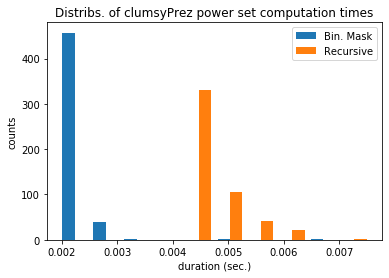

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# routine to repeatedly collect run-time durations
# of function genFunc
def genDurationsDist(genFunc, nReps):
    durations = np.zeros(nReps)
    for i in np.arange(0, nReps):
        tStart = time.time()
        genFunc()
        durations[i] = time.time() - tStart
    return durations
durations_bin = genDurationsDist(clumsyPrez.powerSet_bin, 500) # generate dist. of run-times
                                                               # of Binary Mask ps generator 
durations_rec = genDurationsDist(clumsyPrez.powerSet_rec, 500) # generate dist. of run-times
                                                               # of Recursive ps generator
# Plot overlapping histograms of the two distributions
plt.hist([durations_bin, durations_rec], label=['Bin. Mask', 'Recursive'])
plt.title('Distribs. of clumsyPrez power set computation times')
plt.xlabel('duration (sec.)')
plt.ylabel('counts')
plt.legend()

The two distributions certainly do not appear to be normally distributed. Below, we import and run the Mann-Whitney non-parametric comparison test to assess if the difference between the two reaches statistical significance.

In [99]:
from scipy.stats import mannwhitneyu as mwu
bin_med = np.median(durations_bin) # compute median duration of Bin. Mask ps durations
rec_med = np.median(durations_rec) # compute median duration of Recursive ps durations
print('Median Bin. Mask duration: %0.5f sec., Median Recursive duration: %0.5f sec.'\
      %(bin_med, rec_med))
# Run non-parametric test to determine if differences between 
# distributions are statistically significant
stat, pval = mwu(durations_bin, durations_rec)
print('Mann-Whitney U statistic: %0.2f, p-value: %0.2e'%(stat, pval))

Median Bin. Mask duration: 0.00205 sec., Median Recursive duration: 0.00461 sec.
Mann-Whitney U statistic: 851.00, p-value: 4.75e-163


Measuring the time elapsed for each of the two approaches, we find that, on average, our recursive algorithm does indeed take about twice the time to complete on our machine as the binary-mask method (461 ms versus 205 ms, U = 851., p < 0.01). Of course, ours is certainly not a very controlled comparison; so please take the result with "a grain of salt" if you will.

## Summary

In part one we discussed power sets and their relation to the binary theorem. After some proding, we discovered that Python's `set()` class could not accomodate our need to include sets within sets. To solve the problem, we introduced a custom container class with a set-valued attribute, whose instances are "hashable" and thus, eligible for membership in `set` objects.

Starting with the container strategy from part one, in part two we expanded our custom class, `ModSet()`, to include methods that perform copying, nesting, uniqueness-filtering, set-union and set-difference operations as well as others.  Several of these additional methods would prove necessary for both methods of power set generation to follow.

In part three, we realized our goal of generating power sets. First, we detailed program flow of both the Binary Mask and Recursive approaches of power set generation. The mask routine used list indexing and took more lines of code than recursive method, but called fewer class methods.  The Recursive approach was shorter in terms of lines of code because it incorporated more sibling methods of the `ModSet()` class. Explaining its program flow was "interesting" to the least; with effort on the part of the reader, it might strengthen understanding of recursive algorithms. Without effort, it has potential to confuse.  Finally, we compared relative run times of the two approaches. It turned out that, as expected, the Binary Mask routine took less time to run than its recursive counterpart.

## Sources (part 3)

2. D. Van Dalen; H. C. Doets; H. De Swart (9 May 2014). [Sets: Naïve, Axiomatic and Applied: A Basic Compendium with Exercises for Use in Set Theory for Non Logicians, Working and Teaching Mathematicians and Students](https://books.google.com/books?id=PfbiBQAAQBAJ&pg=PA1#v=onepage&q&f=false). Elsevier Science. ISBN 978-1-4831-5039-0.

3. [Recursion (computer science), Recursion versus Iteration](https://en.wikipedia.org/wiki/Recursion_(computer_science)#Recursion_versus_iteration),  Wikipedia.

In [64]:
class ModSet():
    
    # Instance constructor
    def __init__(self, setElement):
        self.val = setElement  # set arg saved in .val attribute
    
    # String eval representation of self instance 
    def __repr__(self):
        return self.val.__repr__() # Return string eval represent.
                                   # of string object in .val
    
    # Method to make a copy of self instance
    def __copy__(self):
        return ModSet(self.val)
    
    # Modify .val to contain the set of itself, of itself, ...
    # nesting .val "depth" number of levels.
    def pushDown(self, depth):
        while depth > 0:
            self.val = set([ModSet(self.val)])
            depth -= 1     
    
    # Remove one nesting level from set in self.val.
    # If un-nested, ignore.
    def pullUpOneLevel(self):
        listSet = list(self.val)
        if len(listSet) == 1:
            self.val = listSet[0].val
        else:
            pass
    
    # Remove "height" nesting levels from set in
    # self.val by repeatedly calling above method
    def pullUp(self, height):
        while height > 0:
            self.pullUpOneLevel()
            height -= 1
    
    # Within a single set, multiple ModSets with 
    # equivalent .val attributes can exist.  
    # This can occur because each instance of ModSet
    # allocated its own location in memory. For sets
    # to have unique members in terms of ModSet.val
    # values, we define the following filtering method.
    def removeDuplicates(self):
        uniqueSet = set()  # initialize as empty the unique set to be built
        for s in self.val:  # s is a member of the ModSet().val set
            inUniqueSet = False  # initialize match detetion flag as false
            sTest = s  # default conditional testing value for s
            for us in uniqueSet: # us is a member of the uniqueSet set
                usTest = us  # default conditional testing value for us
                if isinstance(us, ModSet): # if member us is a ModSet
                    usTest = us.val        # change testing value to its attribute
                if isinstance(s, ModSet):  # if member s is a ModSet
                    sTest = s.val          # change testing value to its attribute
                if usTest == sTest:  # compare us and s testing values on this run
                    inUniqueSet = True  # if match, set existence flag to true
            if not inUniqueSet:    # only add member s to uniqueSet if
                uniqueSet.add(s)   # match is NOT detected
        self.val = uniqueSet    # set .val to the uniqueSet from above
    
    # union join multiple items, enforce that ModSet members be unique
    def union(self, *modSets):
        for modSet in modSets:
            self.val = self.val.union(modSet.val)  # this is union method from set class
            self.removeDuplicates()  # removes duplicate-valued instances of ModSet members
    
    # set intersect multiple items
    def intersection(self, *modSets):
        for modSet in modSets:
            self.val = self.val.intersection(modSet.val)
    
    # set difference multiple items. note: arg order matters here! 
    def difference(self, *modSets):
        for modSet in modSets:
            self.val = self.val.difference(modSet.val)
    
    # version of above method that returns a new instance,
    # only takes two arguments.
    def diffFunc(modSet1, modSet2):
        return ModSet(set.difference(modSet1.val, modSet2.val))
    
    # Generate powerset via direct, binary mask approach
    def powerSet_bin(self):
        
        ## Initialize local variables ##
        S = list(self.val)         # convert to list for indexing
        setSize = len(self.val)    # count number of members in source set
        psetSize = pow(2, setSize) # calculate the number of elements in the power set
        lastIndex = setSize - 1    # index value of last member
        setIndices = range(0, setSize)  # make indices list for source set
        psetIndices = range(0, psetSize) # make indices list for power set to be built
        bMasks = [[False for s in setIndices] for p in psetIndices] # Initialize binary mask       
        pSet = ModSet(set())  # initialize power set as empty ModSet() instance
        pSet.pushDown(1)  # and nest it down one level for later joining
        
        ## Populate powerset with each subset, one at a time ##
        for i in psetIndices: # loop through each member of power set
            
            ## Generate binary mask for subset i of power set ##
            diff = i  # assign current pSet index as initial bit-flip threshold
            for j in setIndices: # loop through each digit of mask
                
                if (diff >= pow(2, lastIndex - j)): # if threshold >= highest digit, then
                    bMasks[i][lastIndex - j] = True  # set corresp. mask digit to "true"
                    diff -= pow(2, lastIndex - j)   # reduce threshold for next mask digit
                    
            ## Form subset i of power set ##
            # Use generator expression for compactness
            dummySet = ModSet(set([S[k] for k in setIndices if bMasks[i][k] == True]))
            dummySet.pushDown(1)  # nest ModSet instance down one level for union join
            pSet.union(dummySet)  # include new subset in power set
            
        return pSet, bMasks  # return complete power set and binary masks as output
    
    # Generate powerset recursively.
    def powerSet_rec(self):
        
        pSet = self.__copy__()      # Preserve self instance; its copy, pSet
                                    # will be altered
        pSet.pushDown(1)            # Nest pSet for later joining.
              
        if len(self.val) > 0:       # Recursion termination condition
            for elSet in self.val:  # Iterate through members of set self.val
                # Generate subset that remains after removing current
                # element, elSet, from set self.val
                dummySet = self.diffFunc(ModSet(set([elSet]))) 
                # To current powerset, append the powerset of the
                # subset from previous step
                pSet.union(dummySet.powerSet_rec())  # Self-call powerset method,
                                                     # union join powerset of 
                                                     # dummySet with pSet
            return pSet             # Return powerset at current 
                                    # level of recursion
        else:
            dummySet = ModSet(set())  # Generate instance of ModSet of empty set
            dummySet.pushDown(1)      # Nest empty set down one level so it can
            return dummySet           # be union joined in the recursion level
                                      # above that called this run-through.